<h1>Project (Google Play Store)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Description</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Missing-or-Incorrect-Values" data-toc-modified-id="Missing-or-Incorrect-Values"><span class="toc-item-num">&nbsp;&nbsp;</span>Missing or Incorrect Values</a></span></li></ul></li><li><span><a href="#Observations" data-toc-modified-id="Observations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Observations</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Statistics</a></span></li></ul></div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import plotly.express as px
%matplotlib inline
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind, ttest_1samp, median_test, mannwhitneyu, norm, t, mode
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import re
from Assumptions import Assumption_Tester_OLS as atols

my_colors = ['royalblue','seagreen','y', 'salmon','blueviolet','orangered' ,
                 'olive','deeppink', 'purple', 'gold', 'cyan' ]

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Assumptions.py',
 'data',
 'webScraping.ipynb',
 'Week 5-6 Google Player Store.ipynb',
 'Week5-6_Google_Player_Store.ipynb',
 '__pycache__']

# Project Description

##### Motivation Behind The Project
   The goal of this project is to do a relatively simple, yet comprehensive analysis of the Android app market via comparing 10,000 apps in Google Play across different categories. As the result, this straightforward and common-sense analysis should give a broad picture of what the situation in Android app market looks like. Those findings in turn might provide some insights for people who are involved in market research or intersted in knowing what strategies to follow in order to launch and sustain a successful app in Android market.

##### Dataset Description
Original dataset contains the following files:
<ul> <li>googleplaystore.csv: Contains essential data about types and characteristics of applications listed in Google Play.</li>
<li>googleplaystore_user_reviews.csv: This is a pre-processed dataset that has been additionally equipped (based on actual reviews) with sentiment-related information about apps</li>
</ul>

In [3]:
df=pd.read_csv('data/googleplaystore.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# Clean Data

In [5]:
playstore = df.copy() #copy dataframe in applications
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
playstore[playstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


### Missing Values

In [7]:
"""
Change Type to Free for the Apps with Type=O
"""
playstore[playstore.Type.isna()] #we can see that for this app price is zero
playstore['Type'].fillna('Free', inplace=True)

playstore[playstore.Type == '0'] #we can see that for this app the values are not good in each columns so we will remove it
playstore.drop(playstore[playstore.Type == '0'].index,inplace=True)
playstore.Type.value_counts()

Free    10040
Paid      800
Name: Type, dtype: int64

In [8]:
"""
Remove rows with Category '1.9'
"""
playstore.Category.value_counts()
playstore.drop(playstore[playstore.Category == '1.9'].index,inplace=True)

In [9]:
playstore['Android Ver'].value_counts()
playstore['Current Ver'].value_counts()

Varies with device    1459
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
8.5                      1
18.08.05                 1
3.10.8                   1
1.042                    1
2.8.9.1004               1
Name: Current Ver, Length: 2831, dtype: int64

In [10]:
"""
Change Android Verion to the version format
"""
def version_parser(v):
    x = re.findall(r'([\d.]+)', v)
    if x :
        return x[0]
    return v

playstore['Android Ver'] = playstore['Android Ver'].map(version_parser, na_action='ignore')
playstore['Android Ver'].fillna('unknown', inplace=True)

In [11]:
playstore['Android Ver'].value_counts()

4.1                   2452
4.0.3                 1503
4.0                   1375
Varies with device    1362
4.4                    992
2.3                    652
5.0                    605
4.2                    394
2.3.3                  281
2.2                    245
4.3                    243
3.0                    241
2.1                    134
1.6                    116
6.0                     60
7.0                     43
3.2                     36
2.0                     32
5.1                     24
1.5                     20
3.1                     10
2.0.1                    7
8.0                      6
7.1                      3
1.0                      2
unknown                  2
Name: Android Ver, dtype: int64

In [12]:
"""
Installs column, removed + and change format to int
"""
playstore['Installs'] = playstore['Installs'].apply(lambda x : x.strip('+').replace(',', ''))

In [13]:
playstore['Installs'] = playstore['Installs'].astype(int)
playstore['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [14]:
playstore.isin(['Varies with device']).sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       1459
Android Ver       1362
dtype: int64

#### So, I cleaned the data and dropped around 1000 rows which contained 'Varies with device' in Size and Current Ver.

In [15]:
playstore.isin(['Varies with device']).any()

App               False
Category          False
Rating            False
Reviews           False
Size               True
Installs          False
Type              False
Price             False
Content Rating    False
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

In [16]:
"""
Fill Size with 'Varies with device' with NaN
"""
#playstore.drop(playstore[(playstore.Size == 'Varies with device')].index,inplace=True)
playstore['Size'] = playstore['Size'].replace("Varies with device",np.nan)


#### Column Size is another data of type object. Although it makes perfect sense, since it specifies size of an app in Megabytes or Kilobytes, it is still better to convert them to a numeric type column, since Size column will definitely be used in the upcoming analysis.

After looking at the data inside Size column, I arrived to the conclusion that the best way would be to express everything in terms of MB, since this is a standard unit of measure of mobile app's size. 

In [17]:
"""
Converting Size of applications to numeric
"""
playstore['Size'] = playstore['Size'].apply(lambda x: str(x).replace('+',''))
playstore['Size']=playstore['Size'].str.replace('M','').str.replace('k','e-3').astype('float').round(2)

In [18]:
playstore['Size'].mean()
mode(playstore['Size'])

ModeResult(mode=array([11.]), count=array([198]))

In [19]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [20]:
playstore.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          0
dtype: int64

#### for Size column we have 1695 nan, remove them or raplace with mean or mode????

#### for Rating column we have 1416 nan, remove them or raplace with mean or mode????

In [21]:
playstore[playstore.Rating.isna()]

t_data=playstore[pd.notnull(playstore['Rating'])]
# mean,median,mode
rt_mean=np.mean(t_data['Rating'])
rt_median=np.median(t_data['Rating'])
rt_mode=mode(t_data['Rating'])

print(rt_mean,rt_median,rt_mode)
#playstore['Rating'].fillna(rt_median, inplace=True)
playstore.drop(playstore[playstore.Rating.isna()].index,inplace=True)


4.191757420456978 4.3 ModeResult(mode=array([4.4]), count=array([1109]))


#### We have also 3.4% of rows duplicated, so we will remove them

In [22]:
playstore.duplicated().sum()
(playstore.duplicated().value_counts()/playstore.shape[0])*100

False    94.939142
True      5.060858
dtype: float64

In [23]:
playstore.drop_duplicates(inplace=True) 

In [24]:
playstore.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1468
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          4
Android Ver          0
dtype: int64

In [25]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   object 
 4   Size            7424 non-null   float64
 5   Installs        8892 non-null   int32  
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8892 non-null   object 
dtypes: float64(2), int32(1), object(10)
memory usage: 937.8+ KB


In [27]:
# converting review to int
playstore['Reviews']=playstore['Reviews'].astype('int')

In [28]:
"""
Change Last Updated to datetime format
"""
playstore['Last Updated'] = pd.to_datetime(playstore['Last Updated'], utc=True).dt.date
playstore['Last Updated'] = playstore['Last Updated'].map(lambda x: x.strftime('%d-%m-%Y'))

In [29]:
playstore['Last Updated'].unique()

array(['07-01-2018', '15-01-2018', '01-08-2018', ..., '20-01-2014',
       '16-02-2014', '23-03-2014'], dtype=object)

In [30]:
"""
Converting Price of applications to numeric
"""
playstore['Price'].value_counts()
playstore['Price']=playstore.Price.str.lstrip('$').astype(float)

In [31]:
playstore_summary=playstore.describe().T

#### To view the outliers of prices:

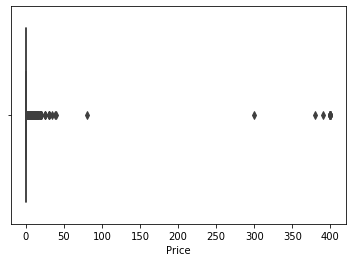

In [32]:
sns.boxplot(x=playstore.Price)

In [33]:
playstore.Price[playstore.Price>0].describe().T
playstore.Price[playstore.Price>0].quantile(.95)
playstore.Price[playstore.Price>24.99].sum()

6181.779999999999

In [34]:
playstore=playstore[playstore.Price < playstore.Price.quantile(.998)]
#playstore.loc[playstore.Price >playstore.Price.quantile(.998)]

In [35]:
playstore.Price.value_counts()

0.00     8279
2.99      110
0.99      105
4.99       68
1.99       59
         ... 
13.99       1
1.59        1
1.61        1
1.20        1
4.60        1
Name: Price, Length: 65, dtype: int64

```sql
playstore_summary['IQR']=playstore_summary['75%']-playstore_summary['25%']
playstore_summary['cutoff']=playstore_summary.IQR*1.95
playstore_summary['lw']=playstore_summary['25%']-playstore_summary.cutoff
playstore_summary.head()

outliers=pd.DataFrame(columns=playstore.columns)

#loop to detect outliers in each column
for col in playstore_summary.index:
   
    lower=playstore_summary.at[col,'lw'] #get upper whisker for this column
    results=playstore[(playstore[col]<lower)].copy() #get the dataframe
    results['Outlier']=col #to be able to identify in which column we obtained outliers
    outliers=outliers.append(results) #save them

data1=playstore.drop(outliers.index)
print('shape after dropping changed:', data1.shape)```

In [36]:
playstore=playstore[playstore.Installs > playstore.Installs.quantile(.05)]

# Observations

##### Overview and Questions¶
<ol>
<li>What kind of apps have the highest market share?</li>
<li>Is there any specific category (ex: Health, Games, Entertainment) dominating the market?</li>
<li>Which categories have the fewest the number of apps available?</li>
<li>What is the average rating accross all apps in the Google Play market?</li>
<li>Does the size of an app affect its rating?</li>
<li>Do users really care about system-heavy apps at all or they only prefer having light-weight apps?</li>
<li>Does the price of an app affect its rating?</li>
<li>Do users always prefer free apps over paid apps?</li>
</ol>

In [37]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### App vs Installs

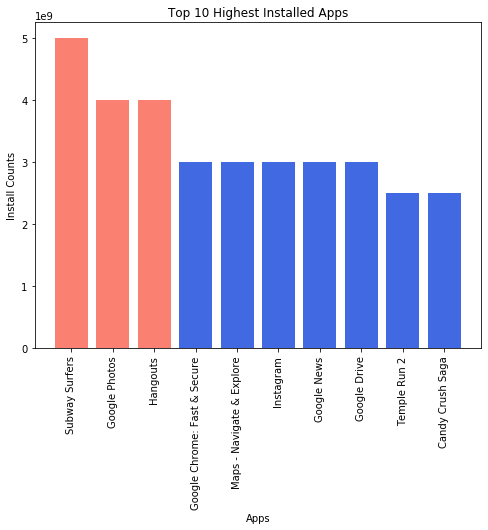

In [38]:
App_installed = playstore.groupby('App')['Installs'].sum().reset_index()
final_result = App_installed.sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(8,6))

plt.bar(final_result.App[:3], final_result.Installs[:3], color=my_colors[3])
plt.bar(final_result.App[3:], final_result.Installs[3:], color=my_colors[0])
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Highest Installed Apps")
plt.show()

### App vs Reviews

Text(0.5, 1.0, 'Most Popular Categories in Play Store')

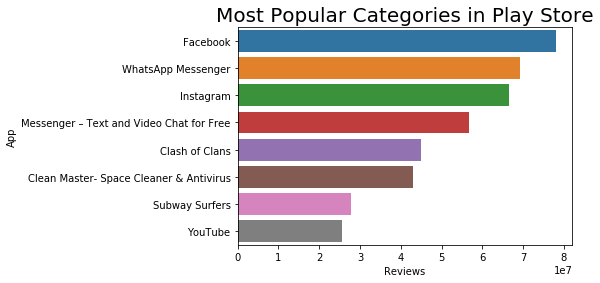

In [39]:
app_reviews = playstore.sort_values(['Reviews'],ascending = 0 )[:20]
ax = sns.barplot(x = 'Reviews' , y = 'App' , data = app_reviews )
ax.set_xlabel('Reviews')
ax.set_ylabel('App')
ax.set_title("Most Popular Categories in Play Store", size = 20)

### Apps in Category

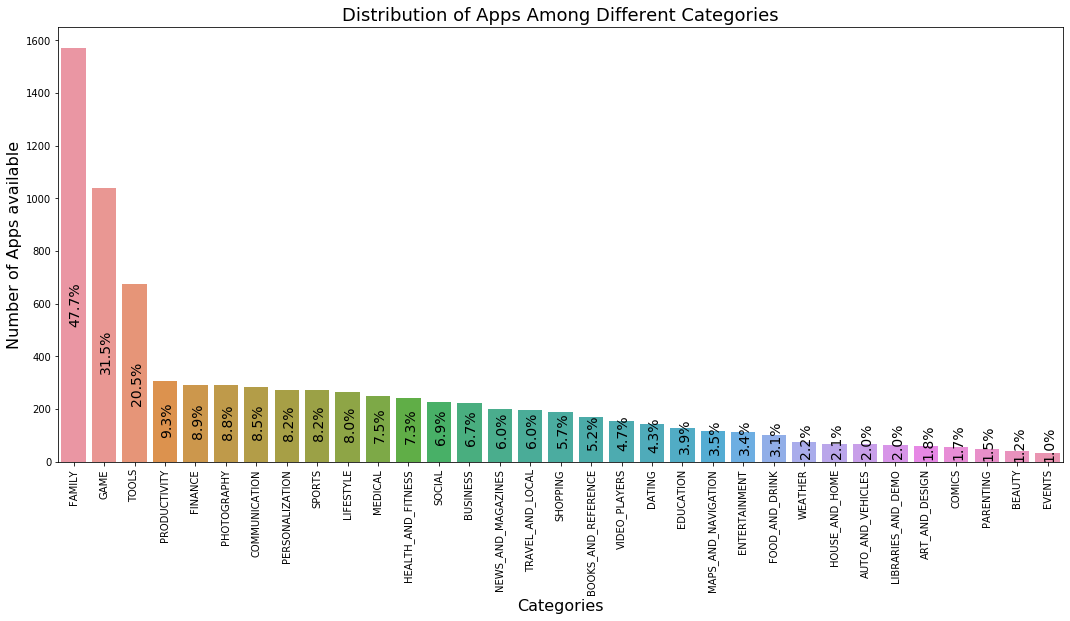

In [40]:
### total number of unique categories
number_of_categories = len(playstore['Category'].unique())

### Count the number of apps in each 'Category' and sort them in descending order
num_of_apps_in_each_category = playstore['Category'].value_counts().sort_values(ascending = False)

### Plot of the results
plt.figure(figsize=(18,8))
plot_apps_in_categories = sns.barplot(
         x = num_of_apps_in_each_category.index,  # index = category name
         y = num_of_apps_in_each_category.values, # value = count for each category
                    )

### This makes the plot to look more appealing
plot_apps_in_categories.set_xticklabels(plot_apps_in_categories.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.xlabel(xlabel='Categories', fontsize = 16)
plt.ylabel(ylabel='Number of Apps available', fontsize = 16)
plt.title("Distribution of Apps Among Different Categories", fontsize = 18)

### Let's add percentages to the plot, since this will facilitate interpreation of the findings
def add_percentages(plot, column):
    total = len(column)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(p.get_height()/total)
        x = p.get_x() + p.get_width() / 1.7   # This part defines a horizontal position of the output relative to a respective bar
        y = p.get_y() + p.get_height()/3.0    # This part defines a vertical position of the output relative to a respective bar
        plot.annotate(percentage, (x, y), size = 14,  rotation=90, horizontalalignment='center')
        
add_percentages(plot_apps_in_categories, num_of_apps_in_each_category.values)

### Finally, let us see how the re

Thus, among 33 different app categories present in Google Play Store, Family, Game, Tools, Business and Medical are the top 5 categories that have the highest market prevalence (in a sense that they have the highest share of apps available). On the other hand, apps in Art and Design, Events, Comics, Parenting and Beauty categories have the fewest number of apps available for download.

### Category vs Installs

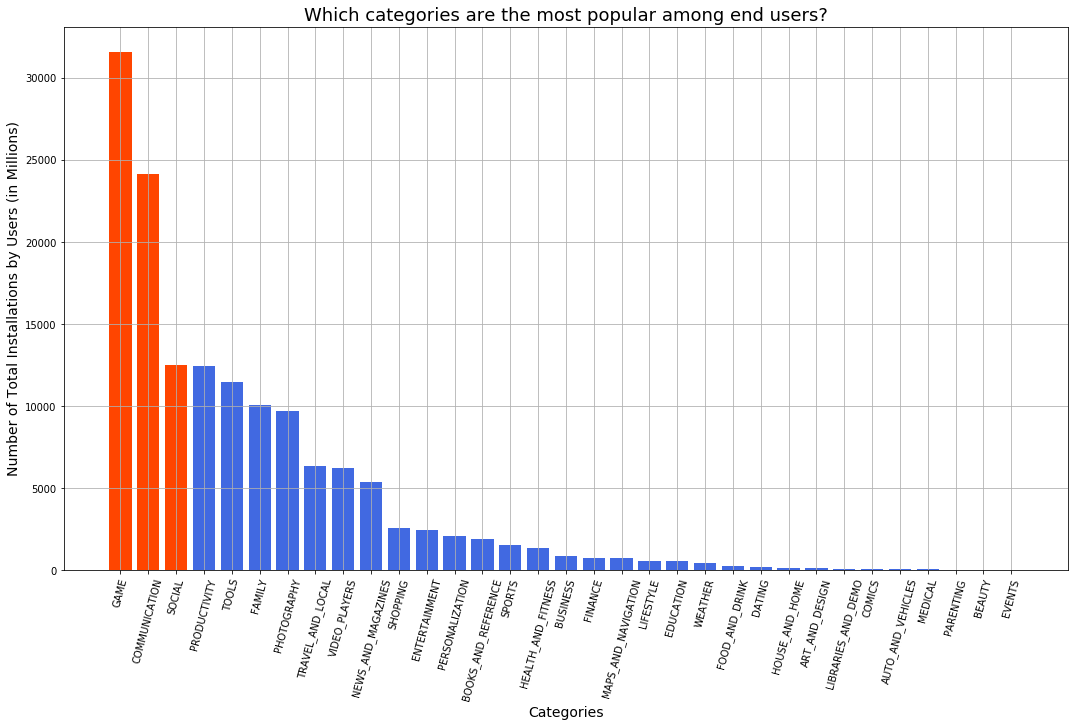

In [41]:
catg_installed = playstore.groupby('Category')['Installs'].sum().sort_values(ascending = False)
# Now, since the resulting numbers are hard to read, I will express them in millions notation.
catg_installed_per_million = catg_installed.div(1000_000).round().astype(int)

plt.figure(figsize=(18,10))
plt.bar(catg_installed_per_million.index[:3], catg_installed_per_million.values[:3], color=my_colors[5])
plt.bar(catg_installed_per_million.index[3:], catg_installed_per_million.values[3:], color=my_colors[0])

plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Installations by Users (in Millions)', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 18)
plt.grid()
plt.xticks(rotation = 75)
plt.show()

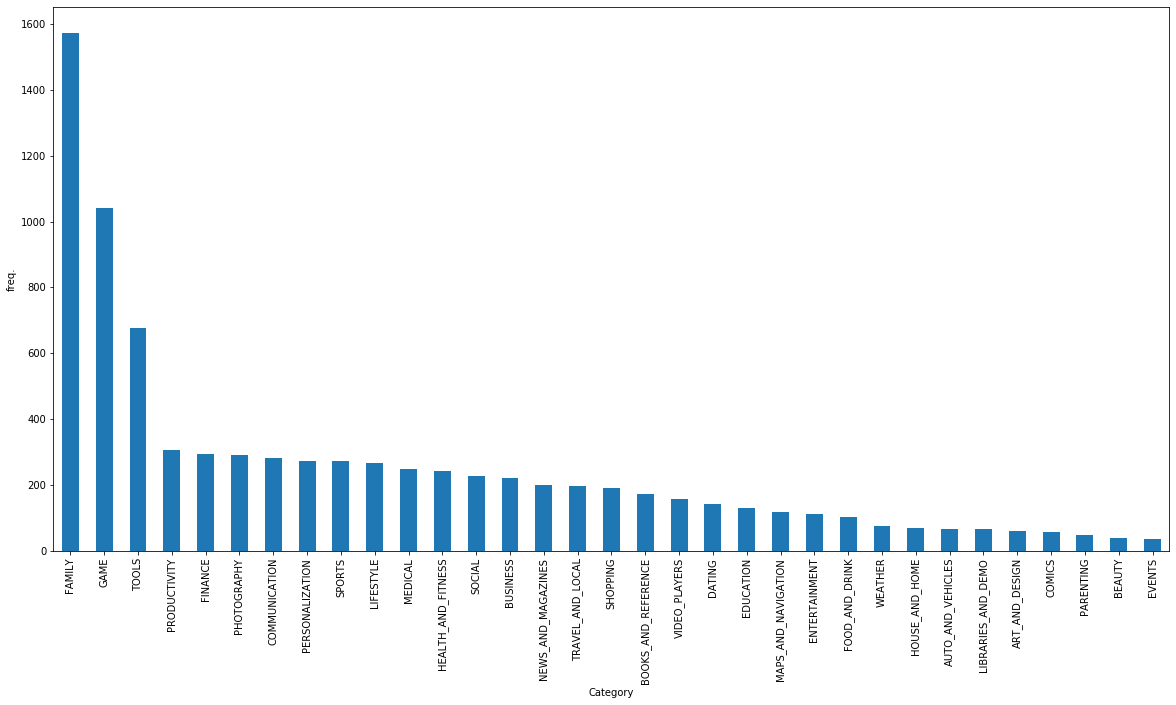

In [42]:
plt.figure(figsize=(20,10))
playstore['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('freq.')
plt.show()

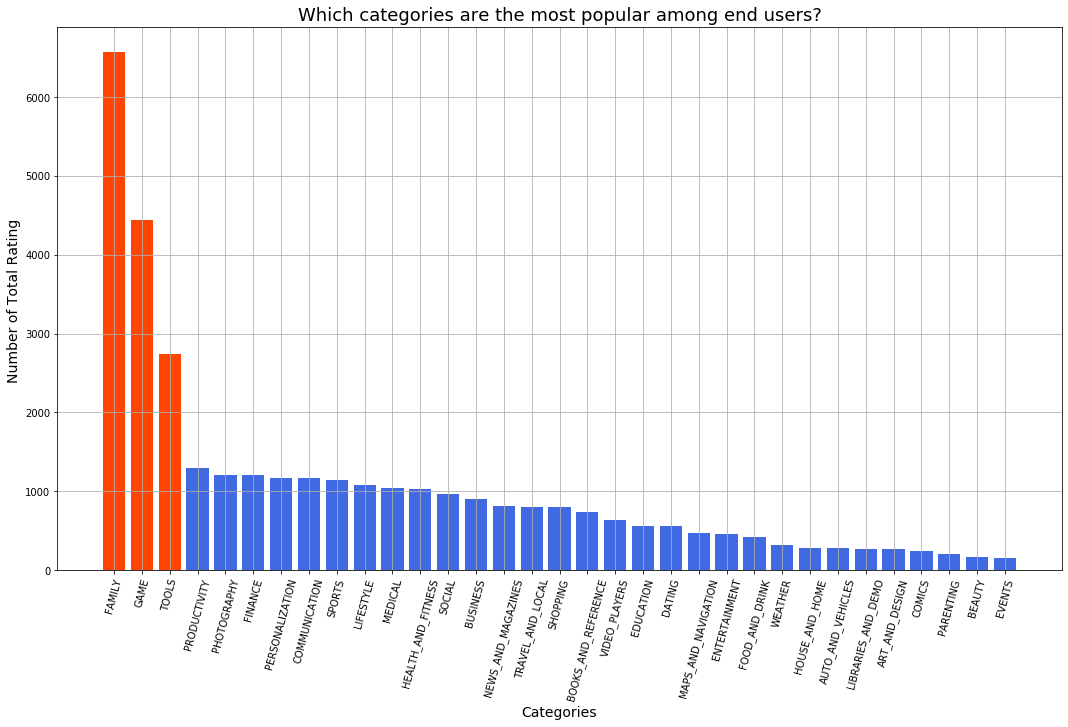

In [43]:
catg_rating = playstore.groupby('Category')['Rating'].sum().sort_values(ascending = False)
# Now, since the resulting numbers are hard to read, I will express them in millions notation.
catg_rating_per_million = catg_rating

plt.figure(figsize=(18,10))
plt.bar(catg_rating_per_million.index[:3], catg_rating_per_million.values[:3], color=my_colors[5])
plt.bar(catg_rating_per_million.index[3:], catg_rating_per_million.values[3:], color=my_colors[0])

plt.xlabel(xlabel='Categories', fontsize = 14)
plt.ylabel(ylabel='Number of Total Rating ', fontsize = 14)
plt.title("Which categories are the most popular among end users?", fontsize = 18)
plt.grid()
plt.xticks(rotation = 75)
plt.show()

### Genres

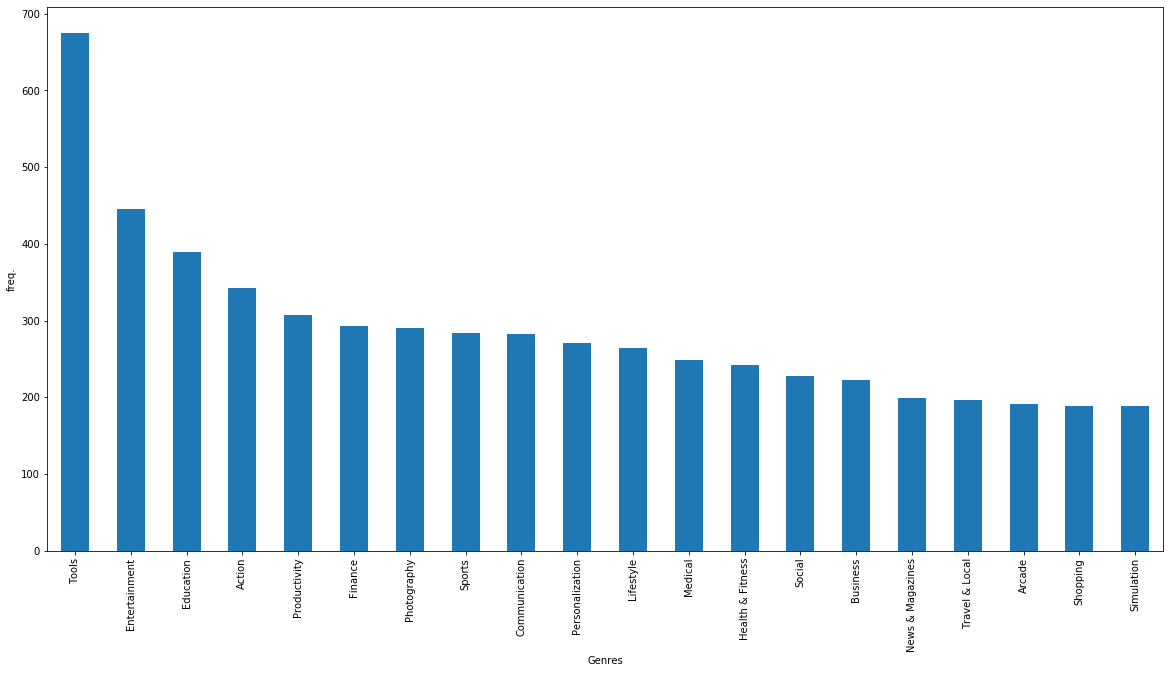

In [44]:
plt.figure(figsize=(20,10))
playstore['Genres'].value_counts().head(20).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('freq.')
plt.show()

### Cenres vs Installs

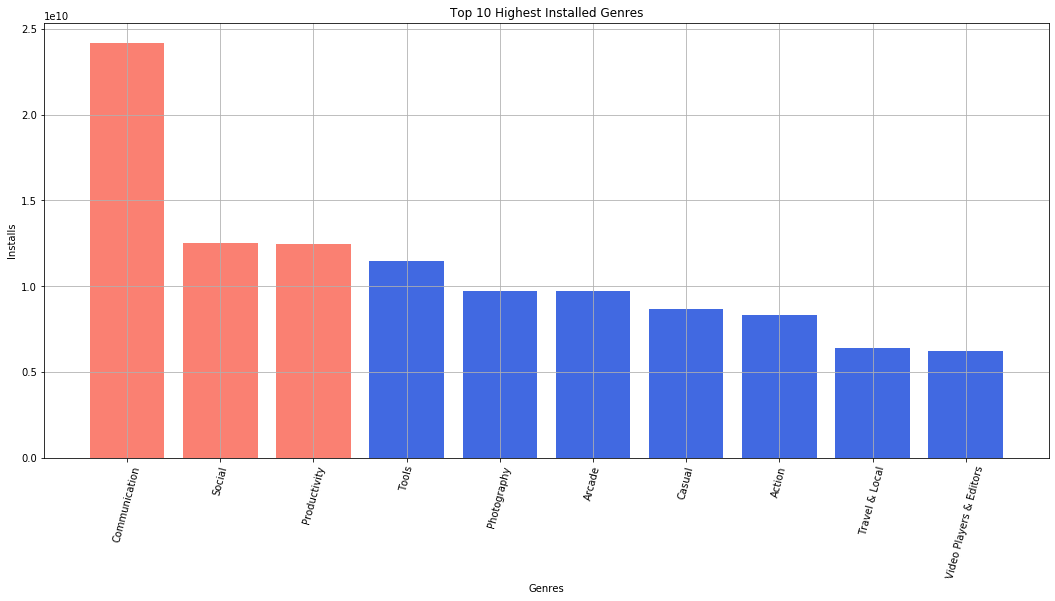

In [45]:
genr_installed = playstore.groupby('Genres')['Installs'].sum().reset_index().sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize=(18,8))
plt.bar(genr_installed.Genres[:3], genr_installed.Installs[:3], color=my_colors[3])
plt.bar(genr_installed.Genres[3:], genr_installed.Installs[3:], color=my_colors[0])
plt.xlabel('Genres')
plt.ylabel('Installs')
plt.title("Top 10 Highest Installed Genres")
plt.grid()
plt.xticks(rotation = 75)
plt.show()

### Size

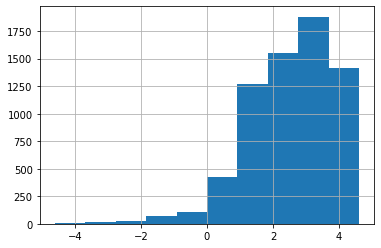

In [46]:
playstore.Size.map(np.log).hist()

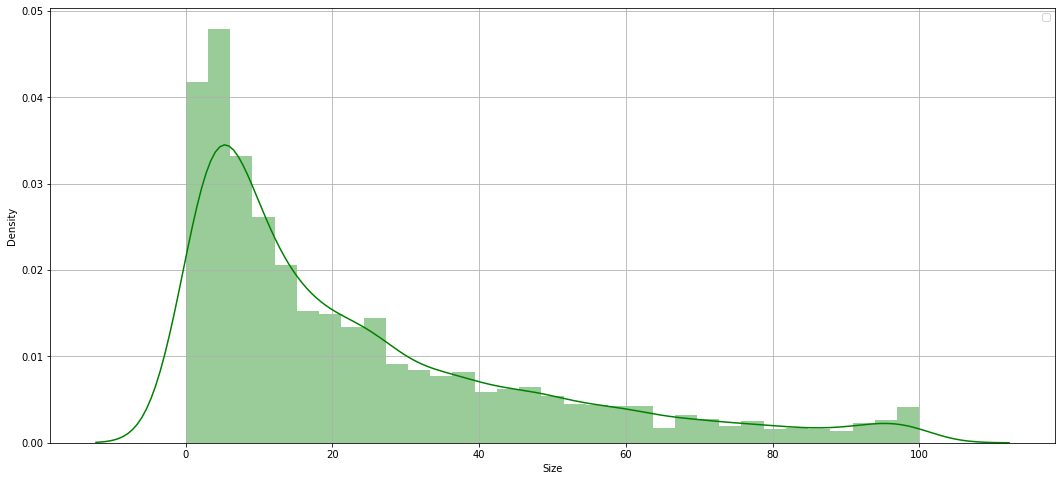

In [47]:
plt.figure(figsize=(18,8))
sns.distplot(playstore.Size , color="green", label=playstore.Category)
plt.legend('')
plt.grid()
plt.show()

### Rating

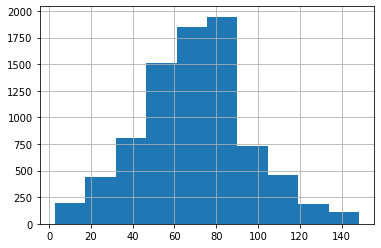

In [48]:
playstore.Rating.map(np.exp).hist()

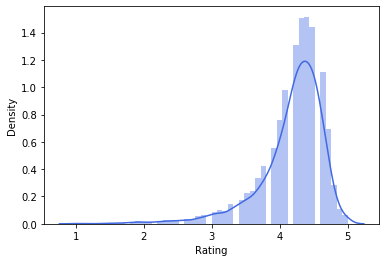

In [49]:
#df = playstore.Rating.apply(lambda x: np.log(x))
sns.distplot(playstore.Rating, kde = True, color=my_colors[0])


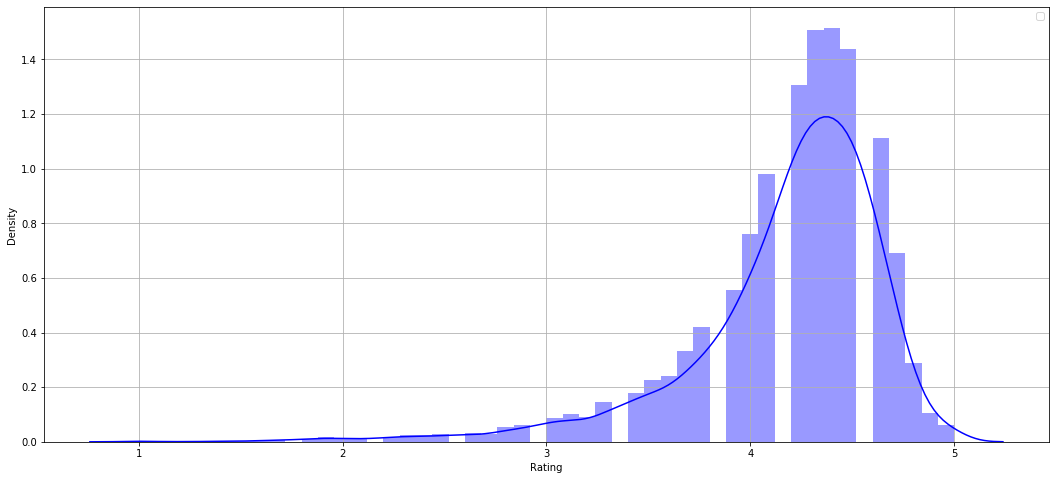

In [50]:
#catg_rating = playstore.groupby('Category')['Rating'].sum().reset_index()
plt.figure(figsize=(18,8))

sns.distplot(playstore.Rating , color="blue", label=playstore.Category)
plt.legend('')
plt.grid()
plt.show()

### Distribution of Ratings

Mean app rating = 4.18
Median app rating = 4.3


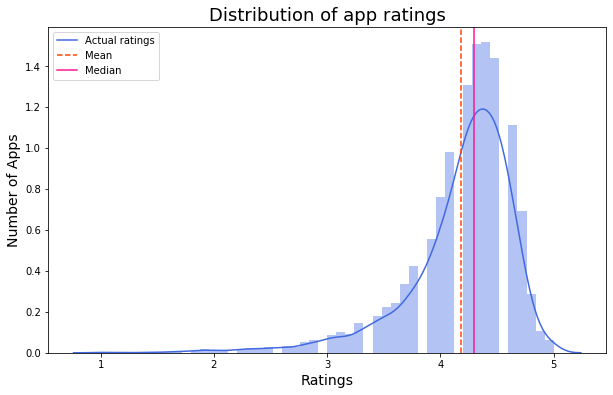

In [51]:
# Average and median rating of apps
mean = round(playstore['Rating'].mean(), 2)
median = round(playstore['Rating'].median(), 2)

print(f'Mean app rating = {mean}', f'Median app rating = {median}',sep= '\n')

# Distribution of apps according to their ratings
rating_histogram = sns.distplot(playstore["Rating"], kde = True, color=my_colors[0])

rating_histogram.axvline(mean, color=my_colors[5], linestyle='--')
rating_histogram.axvline(median, color=my_colors[7], linestyle='-')
plt.legend({'Actual ratings': rating_histogram, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 10, 6)
plt.xlabel("Ratings", fontsize = 14)
plt.ylabel("Number of Apps", fontsize = 14)
plt.title('Distribution of app ratings', fontsize = 18)

plt.show()

Based on this data, one can infer that the average rating across all app categories is 4.19 out of 5. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

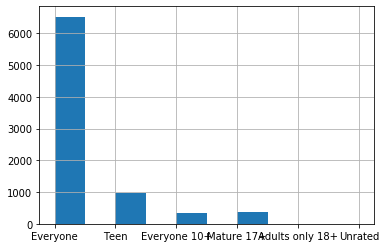

In [52]:
playstore['Content Rating'].hist()

### Price vs Rating

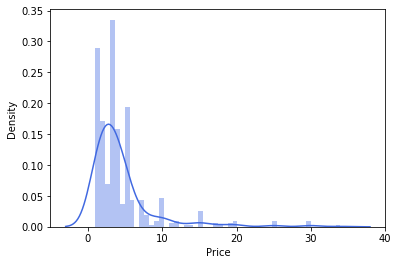

In [53]:
#plt.figure(figsize=(18,8))
sns.distplot(playstore.Price[playstore["Price"]>0], kde = True, color=my_colors[0], bins=50)
#playstore.Price.hist(bins=50)
#(playstore.Price+0.0001).map(np.log).hist()
#df.hist(bins=50)
#plt.grid()


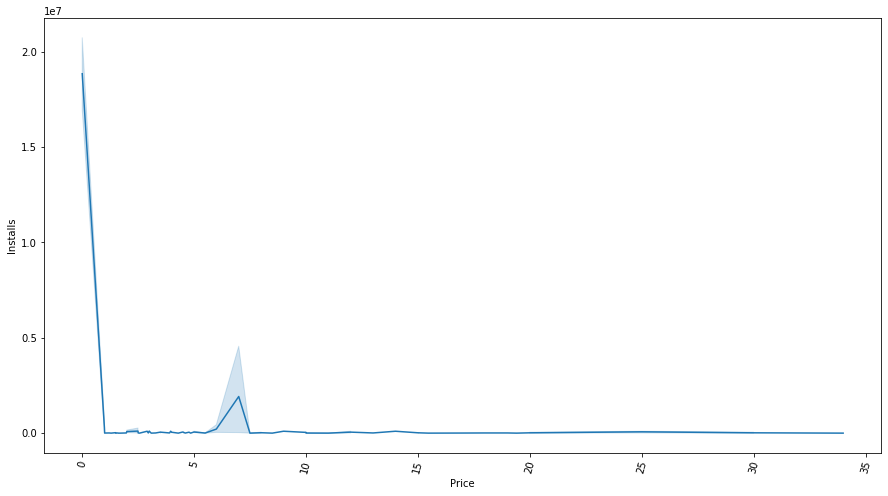

In [54]:
plt.figure(figsize=(15,8))
sns.lineplot(x= playstore.Price , y= playstore.Installs )
#plt.grid()
plt.xticks(rotation = 75)
plt.show()

### Installs

In [55]:
playstore.Installs.describe()

count    8.237000e+03
mean     1.780085e+07
std      8.961485e+07
min      1.000000e+03
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

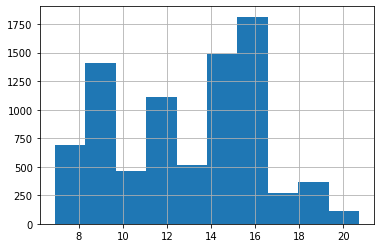

In [56]:
playstore.Installs.map(np.log).hist()

In [57]:
playstore.Installs.unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000])

Type
Free    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Paid    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

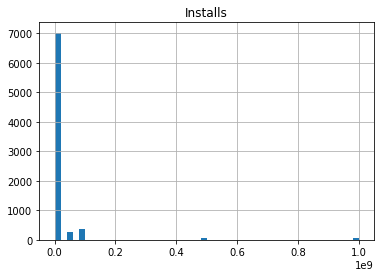

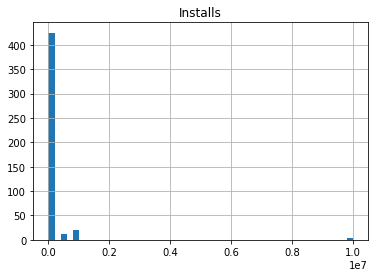

In [58]:
playstore[['Type','Installs']].groupby('Type').hist(bins=50)

### Rating vs Installs

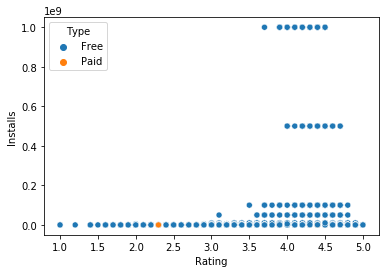

In [59]:
sns.scatterplot(data=playstore, x='Rating', y='Installs', hue='Type')

### Rating vs Reviews

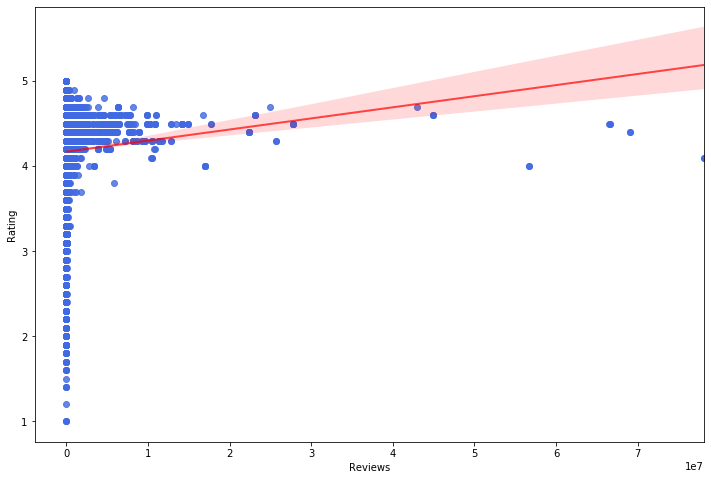

In [60]:
plt.figure(figsize=(12,8))
sns.regplot(x='Reviews', y='Rating',data=playstore,color=my_colors[0], line_kws={"color":"r","alpha":0.7,"lw":2})

<ul><li>Most of the applications have reviews' count below 1000000 if we shun the outliers.</li>
<li>Apps scoring high on ratings generally have high Reviews
</li></ul>

[(0, 1000000)]

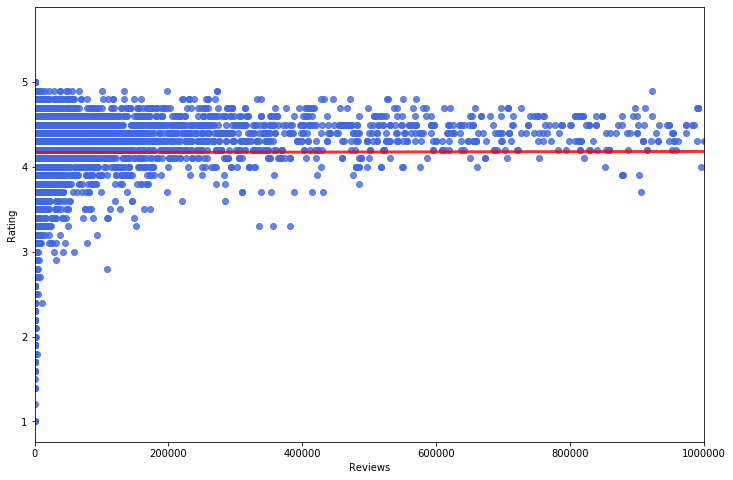

In [61]:
plt.figure(figsize=(12,8))
g = sns.regplot(x='Reviews', y='Rating',data=playstore,color=my_colors[0],
            line_kws={"color":"r","alpha":0.8,"lw":3})
g.set(xlim=(0, 1000000))

<Figure size 1296x576 with 0 Axes>

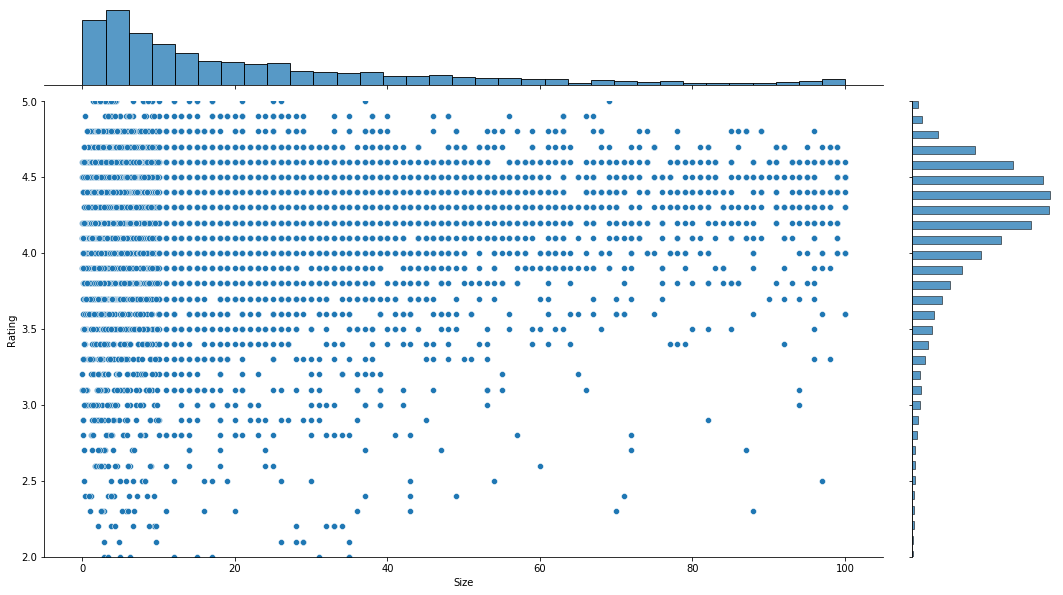

In [62]:
plt.figure(figsize=(18,8))
g = sns.jointplot(x='Size',y='Rating',data=playstore,ylim={2,5}, palette='Set1')
g.fig.set_figwidth(16.27)
g.fig.set_figheight(8.7)
plt.show()

Lighter Apps seems to be more popular than heavier ones!

### Category(free vs paid) vs Rating 

In [63]:
def compute_app_types(df):
    """
    Given a dataframe, compute the number 
    of free and paid apps respectively
    """
    return sum(df.Type == "Free"), sum(df.Type == 'Paid')

def plot_app_types(df):
    """
    Plot app type distributions across categories
    """
    vc_rating = df.Category.value_counts()
    cat_free_apps = []
    cat_paid_apps = []
    for cat in vc_rating.index:
        n_free, n_paid = compute_app_types(df.query("Category == '{}'".format(cat)))
        cat_free_apps.append(n_free)
        cat_paid_apps.append(n_paid)

    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1, len(cat_free_apps)+1), cat_free_apps)
    ax[1].bar(range(1, len(cat_free_apps)+1), cat_paid_apps)

def plot_target_by_group(df, target_col, group_col, figsize=(6,4), title=""):
    """
    Plot the mean of a target column (Numeric) groupped by the group column (categorical)
    """
    order = sorted(list(set(df[group_col])))
    stats = df.groupby(group_col).mean()[target_col]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=group_col, y=target_col, data=df, ax=ax, order=order).set_title(title)
    ax.set(ylim=(3.8, 4.5))  
    ax.tick_params(labelrotation=90)
    return stats

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

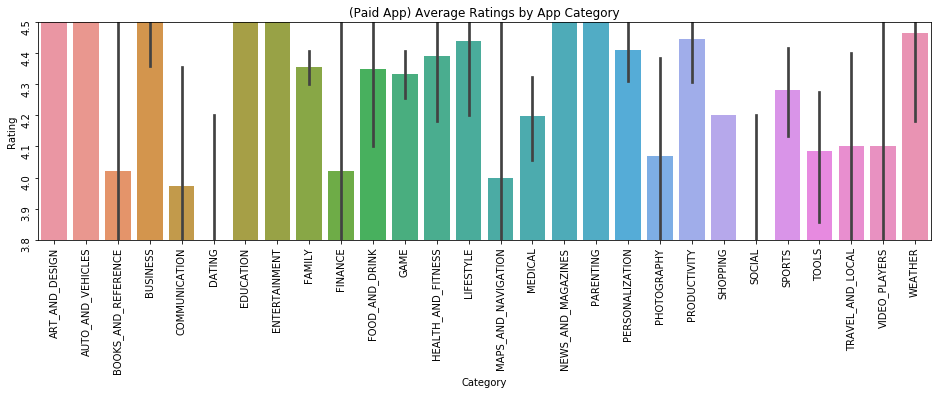

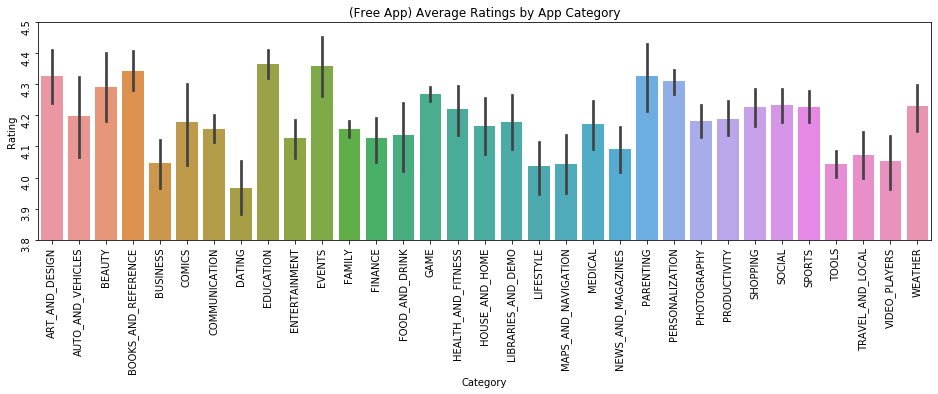

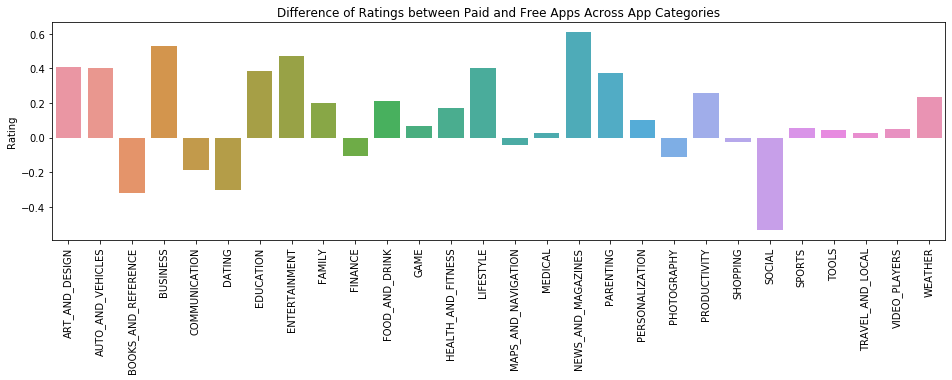

In [64]:
data_filter = playstore[['Rating', 'Type', 'Category']]
"""
Rating Distribution based on Free and Paid Apps
"""
paid_stats = plot_target_by_group(data_filter.query('Type == "Paid"'), 'Rating', 'Category', (16, 4), "(Paid App) Average Ratings by App Category")
free_stats = plot_target_by_group(data_filter.query('Type == "Free"'), 'Rating', 'Category', (16, 4), "(Free App) Average Ratings by App Category")


fig, ax = plt.subplots(figsize=(16,4))
sorted_idx = sorted(paid_stats.index)
rating_diff = paid_stats[sorted_idx] - free_stats[sorted_idx]
g = sns.barplot(x=sorted_idx, y=rating_diff, ax=ax)
g.set_title("Difference of Ratings between Paid and Free Apps Across App Categories");

g.set_xticklabels(g.get_xticklabels(), rotation=90)

### Paid vs Free Apps

As the next logical step, let us examine whether there is a significant difference in popularities between free and paid apps. 

Questions:
<ol><li>Is it the case that in Android world paid apps are (on average) demanded as much as free apps are? If not, how big is the divergence?</li>
<li>Do commercial mobile apps receive higher ratings when compared to free apps in the same category?</li></ol>

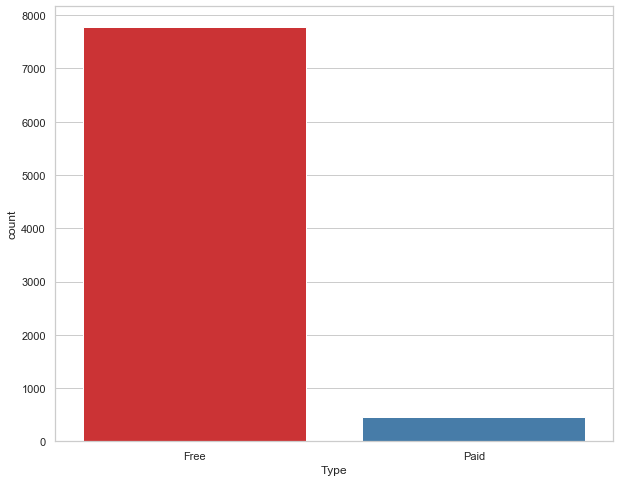

In [65]:
#Count of free vs paid apps
plt.figure(figsize=(10,8))
sns.set(style="whitegrid",palette="Set1")
sns.countplot(playstore["Type"])

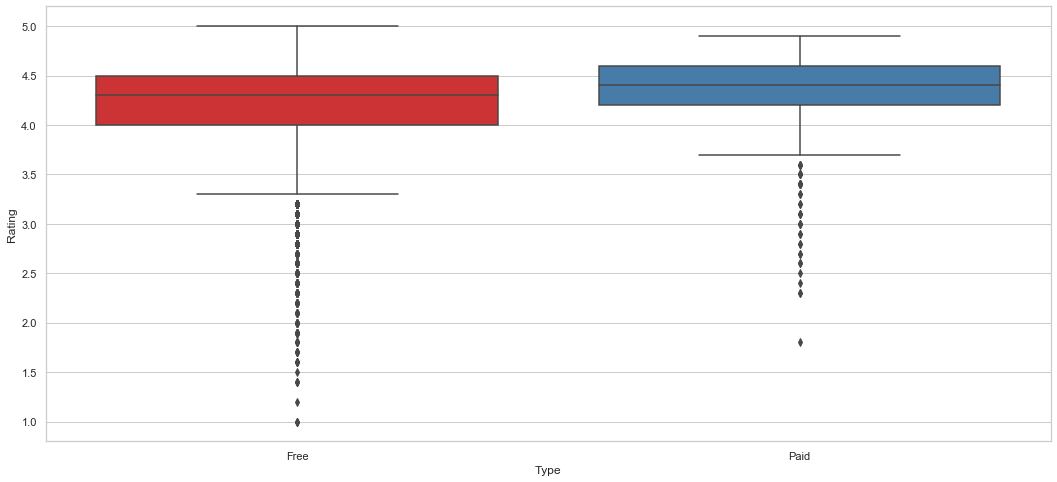

In [66]:
playstore.Type.unique()
plt.figure(figsize=(18,8))
sns.boxplot(x=playstore.Type, y=playstore.Rating, palette="Set1")
#plt.legend('')
plt.show()

Type
Free    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
Paid    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

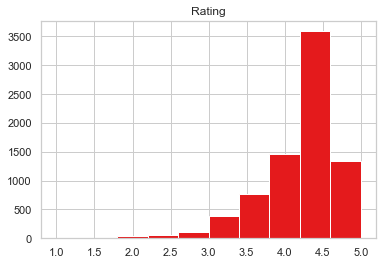

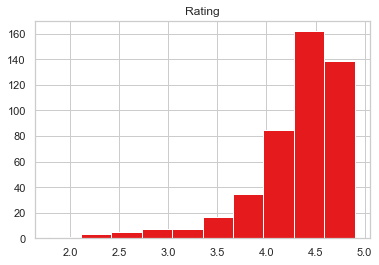

In [67]:
playstore[['Type','Rating']].groupby('Type').hist()

### Correlations

In [68]:
playstore.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.081242,0.107860,0.061939,0.029960
Reviews,0.081242,1.000000,0.241403,0.632541,-0.027111
Size,0.107860,0.241403,1.000000,0.165715,-0.013679
Installs,0.061939,0.632541,0.165715,1.000000,-0.033114
Price,0.029960,-0.027111,-0.013679,-0.033114,1.000000


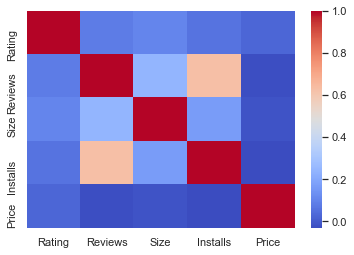

In [69]:
sns.heatmap(playstore.corr(), cmap='coolwarm')

In [70]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

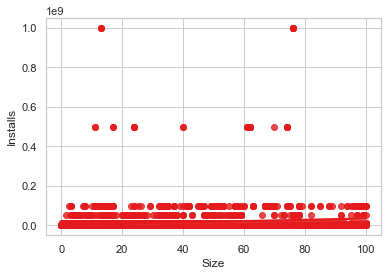

In [71]:
sns.regplot(data=playstore, x='Size', y='Installs')

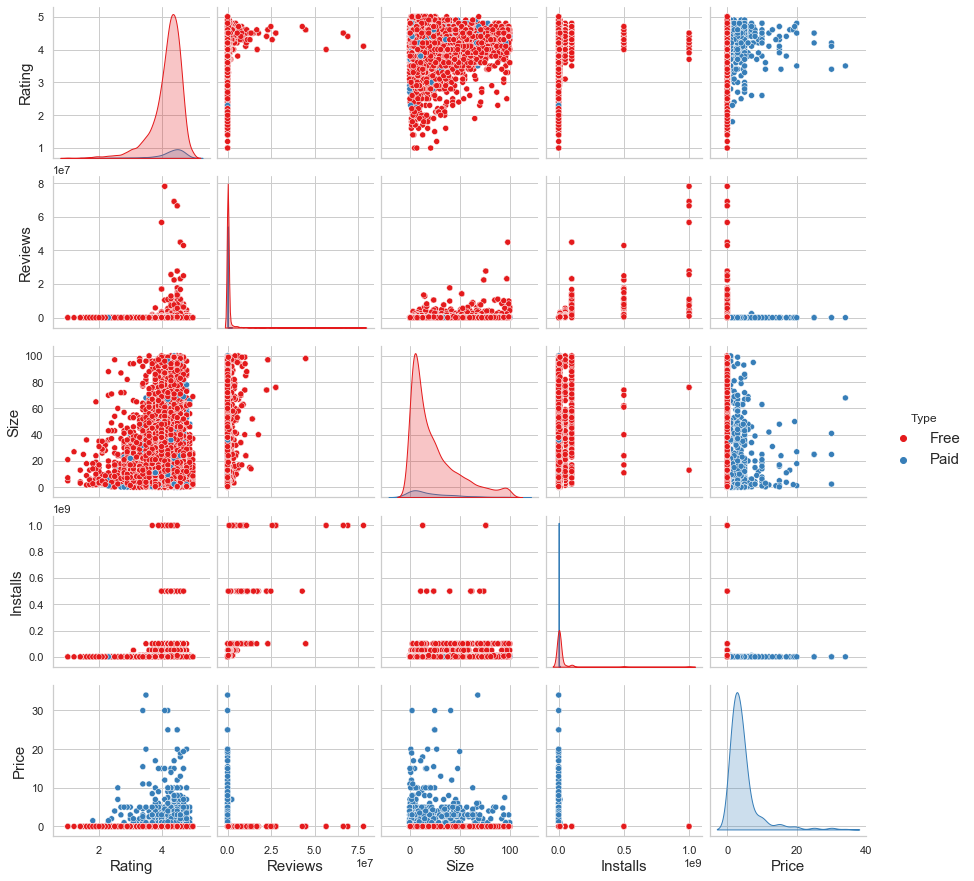

In [72]:
# Pair plot
rc={'axes.labelsize': 15, 'font.size': 15, 'legend.fontsize': 15.0, 'axes.titlesize': 15, 'figure.figsize':(20.7,20.27)}
plt.rcParams.update(**rc)
cols= playstore[[ 'App', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
                   'Price', 'Content Rating']]
cols.head()
g = sns.pairplot(data=cols, hue='Type', dropna='true', palette='Set1')

# Statistics

#### hypothesis for Rating

Ho=There is no difference on average rating between Free and Paid apps. Significants level= 95% two-sided test

In [73]:
free=playstore.loc[playstore.Type=='Free', 'Rating']
paid=playstore.loc[~(playstore.Type=='Free'), 'Rating']
paid

234      4.7
235      4.8
427      4.0
476      4.2
477      2.6
        ... 
10679    4.6
10682    4.3
10760    4.4
10782    3.8
10785    4.2
Name: Rating, Length: 461, dtype: float64

In [74]:
sm.stats.ttest_ind(free, paid, alternative='two-sided')

(-4.896520427983596, 9.94045835423842e-07, 8235.0)

In [75]:
playstore['exp_Rating'] = playstore['Rating'].map(np.exp)

free=playstore.loc[playstore.Type=='Free', 'exp_Rating']
paid=playstore.loc[~(playstore.Type=='Free'), 'exp_Rating']
sm.stats.ttest_ind(free, paid, alternative='two-sided')

(-6.356551942916466, 2.173076142444708e-10, 8235.0)

#### We changed the null values in Rating with the median.Based on the results of our test we see that probability of being wrong by rejecting the null hypothesis (that both types of apps have equal average ratings) is 0.00010, so we can reject our null hypothesis. 

#### We want to observe our Hypothesis test  without NaN value. After we dropped all NaN value in the Rating column, our p-value has doubled. However, it is still 0%, lower than our significance level. Hence, we assume that there is a significant difference between paid and free apps on ratings.

In [76]:
stat, p, med, tbl = median_test(free, paid)

In [77]:
print(stat, p, med, tbl)

44.25806075925774 2.878167943893846e-11 73.69979369959579 [[3171  261]
 [4605  200]]


In [78]:
stat, p = mannwhitneyu(free, paid)
stat, p

(1449993.0, 2.115522265003606e-12)

#### hypothesis for Installs

In [79]:
free=playstore.loc[playstore.Type=='Free', 'Installs']
paid=playstore.loc[~(playstore.Type=='Free'), 'Installs']

In [80]:
sm.stats.ttest_ind(free, paid, alternative='two-sided')

(4.35738609473909, 1.3322164937791395e-05, 8235.0)

In [81]:
playstore.groupby('Type').Installs.mean()

Type
Free    1.884730e+07
Paid    1.496009e+05
Name: Installs, dtype: float64

# Modeling

In [82]:
playstore['before Updated'] = pd.to_datetime(playstore['Last Updated']).max()-pd.to_datetime(playstore['Last Updated'])

In [83]:
pd.to_datetime(playstore['Last Updated']).max()

Timestamp('2018-12-07 00:00:00')

In [84]:
playstore[pd.to_datetime(playstore['Last Updated']) == pd.to_datetime(playstore['Last Updated']).min()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,exp_Rating,before Updated
7479,FML F*ck my life + widget,FAMILY,4.2,1415,0.21,100000,Free,0.0,Everyone,Entertainment,21-05-2010,3.1,1.5,66.686331,3122 days


# Linear Regression

Lets work on our categorical values: Category, Type, Content Rating, Genre

### Model for Installs

In [85]:
playstore['size_log'] = playstore.Size.map(np.log)
playstore['installs_log'] = playstore.Installs.map(np.log)
playstore['rating_exp'] = playstore.Rating.map(np.exp)
playstore['reviews_log'] = playstore.Reviews.map(np.log)

In [86]:
install_df=playstore[['Category', 'rating_exp', 'reviews_log', 'size_log','installs_log', 'Type']].copy()

In [87]:
install_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [111]:
install_df.replace( {'Category' : { 'ART_AND_DESIGN' : 'OTHER', 'AUTO_AND_VEHICLES' : 'OTHER', 'BEAUTY' :'OTHER',
                                   'BOOKS_AND_REFERENCE' : 'OTHER', 'COMICS' : 'OTHER', 'BUSINESS' :'OTHER',
                                   'ENTERTAINMENT' : 'OTHER', 'EVENTS' : 'OTHER', 'BEAUTY' :'OTHER',
                                   'ART_AND_DESIGN' : 'OTHER', 'FOOD_AND_DRINK' : 'OTHER', 'HEALTH_AND_FITNESS' :'OTHER',
                                   'HOUSE_AND_HOME' : 'OTHER', 'LIBRARIES_AND_DEMO' : 'OTHER', 'MEDICAL' :'OTHER',
                                   'SHOPPING' : 'OTHER', 'PHOTOGRAPHY' : 'OTHER', 'SPORTS' :'OTHER',
                                  'TRAVEL_AND_LOCAL' : 'OTHER',  'PERSONALIZATION' : 'OTHER','PRODUCTIVITY' :'OTHER',
                                  'WEATHER' : 'OTHER', 'VIDEO_PLAYERS' : 'OTHER', 'NEWS_AND_MAGAZINES' :'OTHER',
                                  'MAPS_AND_NAVIGATION' : 'OTHER','LIFESTYLE':'OTHER', 'PARENTING':'OTHER'
                                  ,'EDUCATION': 'OTHER','FINANCE': 'OTHER'}},inplace=True)

In [112]:
dummy_C = pd.get_dummies(install_df['Category'])
del dummy_C[dummy_C.columns[-1]]#To avoid dummy variable trap
install_df = pd.concat([install_df , dummy_C], axis = 1)

dummy_T = pd.get_dummies(install_df['Type'])
del dummy_T[dummy_T.columns[-1]]#To avoid dummy variable trap
install_df = pd.concat([install_df, dummy_T], axis = 1)

In [113]:
installmodel = install_df.drop(["Category", "Type"], axis =1)

In [114]:
X=installmodel.drop('installs_log', axis=1)
y=installmodel.installs_log

In [116]:
sm.OLS(y, sm.add_constant(X.drop(['OTHER','COMMUNICATION'],axis=1).astype(float))).fit().summary()

ValueError: could not convert string to float: 'Photo Editor & Candy Camera & Grid & ScrapBook'

In [93]:
tester=atols(X.drop(['OTHER','COMMUNICATION'],axis=1),y)
tester.run_all()

Fitting linear regression


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [94]:

#playstore.installs_log[playstore.installs_log < playstore.installs_log.quantile(.97)].hist()

In [95]:
install_df = playstore[playstore.installs_log < playstore.installs_log.quantile(.98)]

In [96]:
X=installmodel.drop('installs_log', axis=1)
y=installmodel.installs_log

In [97]:
sm.OLS(y, sm.add_constant(X.drop(['OTHER','COMMUNICATION','size_log'],axis=1).astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           installs_log   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 1.508e+04
Date:                Thu, 17 Dec 2020   Prob (F-statistic):               0.00
Time:                        21:37:07   Log-Likelihood:                -10781.
No. Observations:                8237   AIC:                         2.158e+04
Df Residuals:                    8229   BIC:                         2.163e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.2761      0.053     80.123      0.000       4.172       4.381
rating_exp     -0.0108      0.000    -27.296      0.000      -0.012      -0.010
reviews_log     0.9033      0.003    301.861      0.000       0.897       0.909
DATING         -0.3419      0.076     -4.477      0.000      -0.492      -0.192
FAMILY         -0.1399      0.026     -5.421      0.000      -0.190      -0.089
GAME           -0.2872      0.031     -9.192      0.000      -0.348      -0.226
SOCIAL         -0.2638      0.061     -4.337      0.000      -0.383      -0.145
Free            1.5202      0.044     34.762      0.000       1.434       1.606
==============================================================================
Omnibus:                      415.061   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              771.373
Skew:                           0.384   Prob(JB):                    3.15e-168
Kurtosis:                       4.288   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting linear regression

R^2: 0.9276665415793643 

Coefficients
-------------------------------------
Intercept: 4.276121829357521
rating_exp: -0.01
reviews_log: 0.9
DATING: -0.34
FAMILY: -0.14
GAME: -0.29
SOCIAL: -0.26
Free: 1.52

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


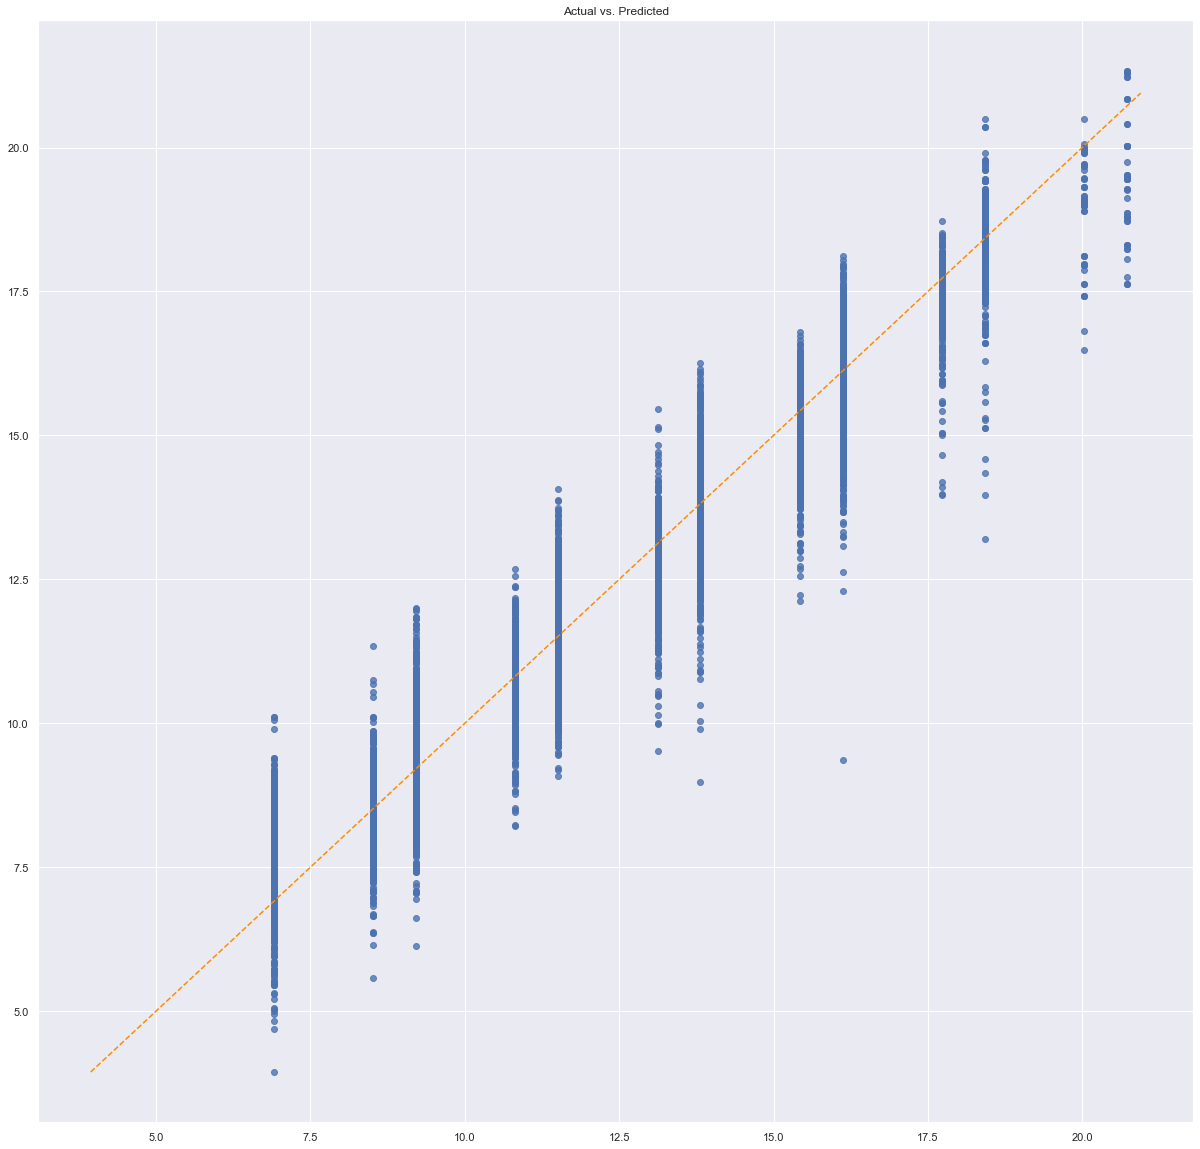

If non-linearity is apparent, consider adding a polynomial term 
		or using box-cox transformation to make X or y follow normal distribution



Building a correlation table


Parameters that are most likely VIOLATE linearity assumption and their correlation with installs_log


rating_exp    0.142093
Name: installs_log, dtype: float64


Parameters that are most likely FOLLOW linearity assumption and their correlation with installs_log


reviews_log    0.952451
Name: installs_log, dtype: float64


Assumption 2: Little to no multicollinearity among predictors


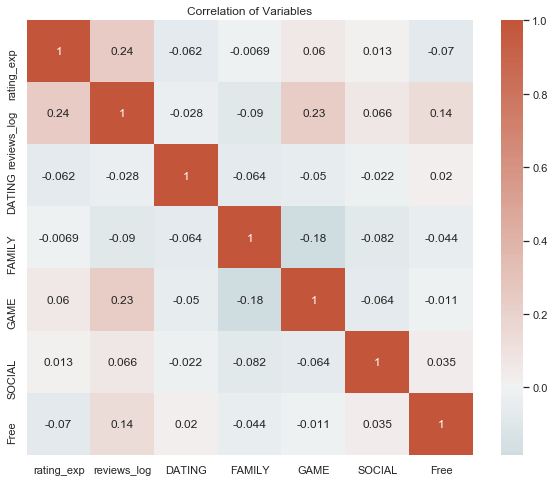

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------
Free: 7.953024312210602
reviews_log: 7.791513559341187
rating_exp: 7.000430777799449
FAMILY: 1.2732107679014193
GAME: 1.2631864812773141
SOCIAL: 1.0501481767943524
DATING: 1.0273182470028748

0 cases of possible multicollinearity
0 cases of definite multicollinearity

Assumption satisfied

Assumption 3: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 1.6760797258548987
Little to no autocorrelation 

Assumption satisfied

Assumption 4: Homoskedasticity of Error Terms
Residuals should have relative constant variance


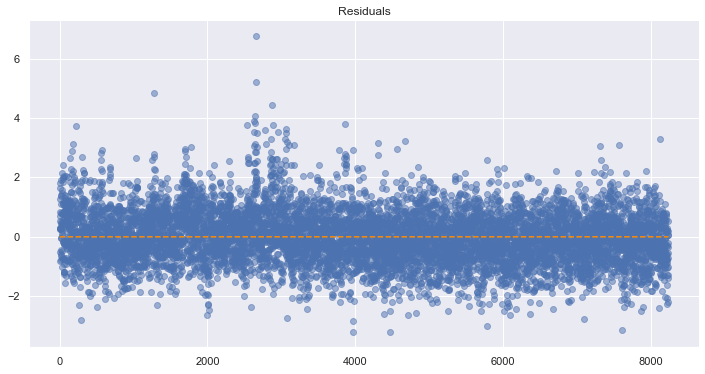

If heteroskedasticity is apparent, confidence intervals and predictions will be affected

Consider removing outliers and preprocessing features - nonlinear transformation can help


{'Lagrange Multiplier': 1869.2498064976307,
 'pvalue for LM': 0.0,
 'F stats': 345.1303261410064,
 'pvalue for Fstats': 0.0}

Signs of positive autocorrelation 

Assumption potentially not satisfied 


Assumption 5: The error terms are kinda normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 8.02353905108774e-20
Residuals are not normally distributed


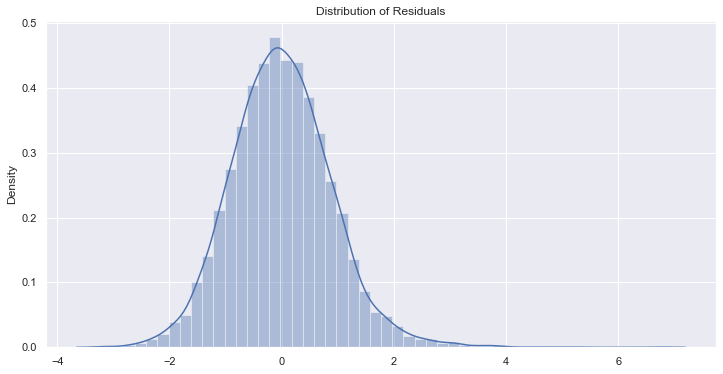


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables
Building a probability plot


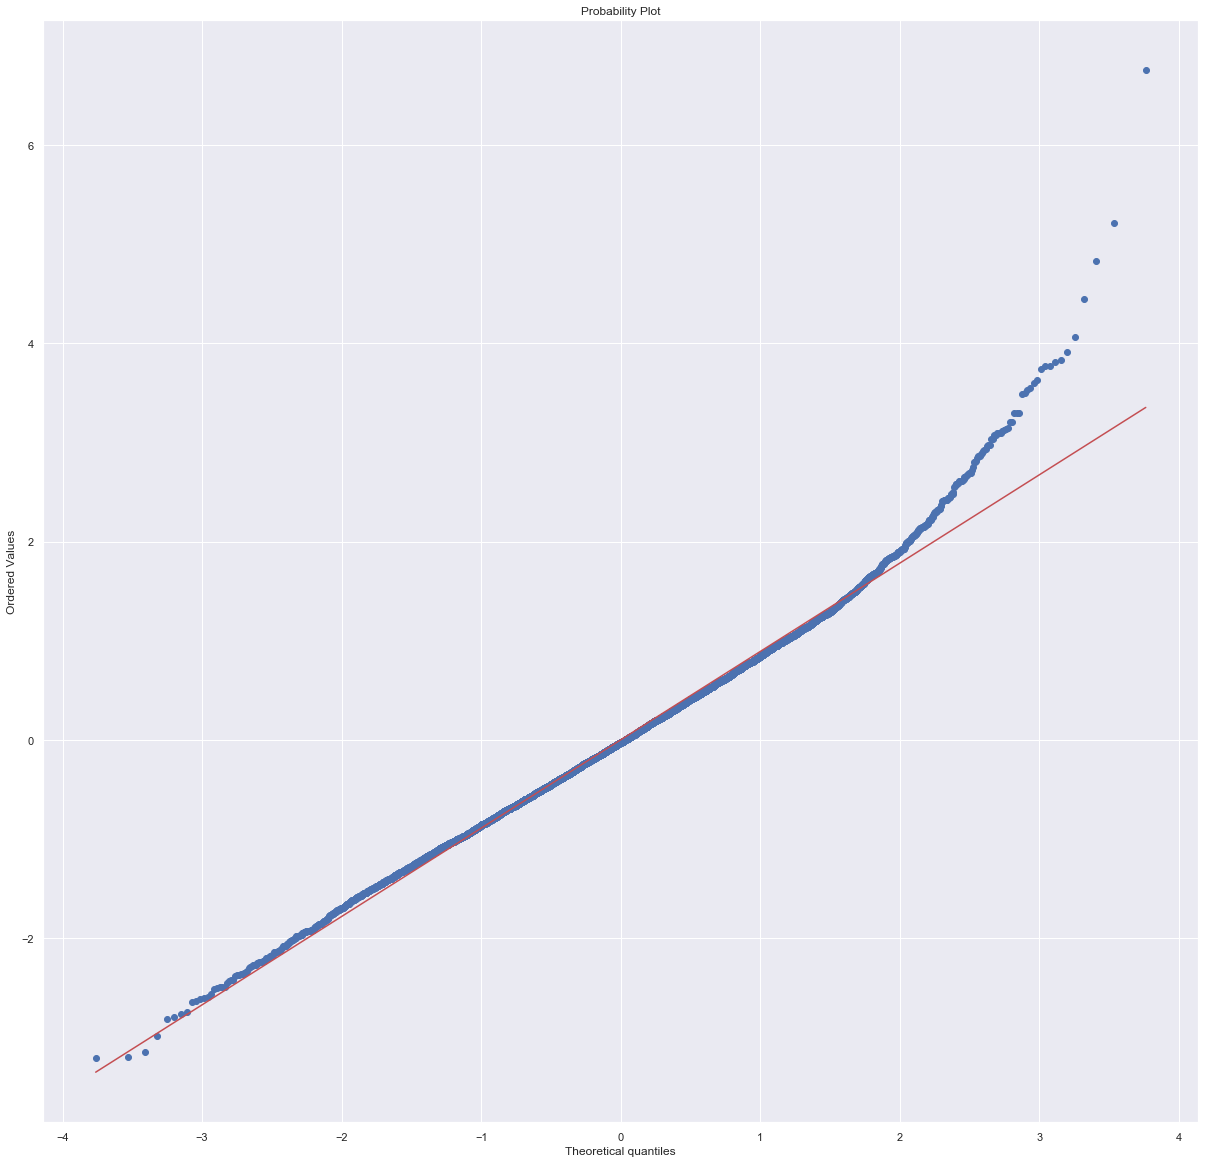


In your dataset you quite fat tails. You have 0.021 potential outliers (172 rows)


{'Satisfied': ['Multicollinearity', 'Autocorrelation'],
 'Potentially': ['Linearity', 'Autocorrelation', 'Sub-Normality'],
 'Violated': ['Normality']}

In [98]:
tester=atols(X.drop(['OTHER','COMMUNICATION','size_log'],axis=1),y)
tester.run_all()

### Model for Reviews

In [99]:
reviewmodel = install_df.drop(["Category", "Type"], axis =1)

In [100]:
X=reviewmodel.drop('reviews_log', axis=1)
y=reviewmodel.reviews_log

In [101]:
sm.OLS(y, sm.add_constant(X.drop(['COMMUNICATION','OTHER','FAMILY'],axis=1).astype(float))).fit().summary()

KeyError: "['COMMUNICATION' 'OTHER' 'FAMILY'] not found in axis"

In [102]:
tester=atols(X.drop(['COMMUNICATION','OTHER','FAMILY'],axis=1),y)
tester.run_all()

KeyError: "['COMMUNICATION' 'OTHER' 'FAMILY'] not found in axis"

In [103]:
#install_df = install_df[install_df.reviews_log > install_df.reviews_log.quantile(.02)]